# **Prediction of Rice Production on Sumatera Island, Indonesia**

- Nama: Arjuna Nur Arrafi
- NIM: A11.2022.14174
- Mata Kuliah: Machine Learning
- Prodi: Teknik Informatika

# Ringkasan & Permasalahan Project
**Ringkasan**
Project ini bertujuan untuk mengembangkan model machine learning yang dapat
memprediksi hasil pertanian komoditas bahan pangan di wilayah Sumatera berdasarkan
data cuaca historis dan variabel lainnya. Model ini diharapkan dapat membantu petani
dan pemangku kepentingan lainnya dalam mengantisipasi dan mengelola risiko yang
terkait dengan perubahan cuaca yang semakin ekstrim akibat dampak perubahan iklim
global.


**Permasalahan Project**

1.1 Prediksi Produksi Padi yang Akurat:
Bagaimana kita dapat memprediksi produksi padi di Pulau Sumatera dengan akurasi tinggi menggunakan data historis dan faktor cuaca? Memastikan model prediksi dapat memberikan hasil yang akurat sangat penting untuk membantu petani dalam perencanaan dan pengambilan keputusan.

1.2 Identifikasi Faktor yang Mempengaruhi Produksi:
Faktor-faktor apa saja yang secara signifikan mempengaruhi produksi padi di Pulau Sumatera? Identifikasi faktor-faktor kunci seperti curah hujan, suhu, dan kelembapan akan membantu dalam memahami dinamika produksi padi dan memberikan wawasan untuk pengelolaan pertanian yang lebih baik.

1.3 Optimasi Luas Panen:
Bagaimana kita dapat mengoptimalkan luas panen untuk memaksimalkan produksi padi? Dengan mengetahui hubungan antara luas panen dan faktor-faktor lingkungan, kita dapat memberikan rekomendasi yang lebih baik untuk pemanfaatan lahan yang lebih efektif.

1.4 Pengelolaan Risiko:
Bagaimana kita dapat mengurangi risiko kerugian yang disebabkan oleh kondisi cuaca yang tidak dapat diprediksi? Dengan menggunakan model prediksi yang andal, kita dapat memberikan peringatan dini dan strategi mitigasi risiko untuk para petani.

1.5 Efisiensi Penggunaan Sumber Daya:
Bagaimana kita dapat memastikan penggunaan sumber daya seperti air dan pupuk secara efisien untuk mencapai produksi padi yang optimal? Dengan menganalisis data dan memberikan rekomendasi yang tepat, kita dapat membantu petani mengoptimalkan penggunaan sumber daya dan mengurangi pemborosan.



**Tujuan yang akan dicapai**

- Mengumpulkan dan menganalisis data historis produksi padi di Pulau Sumatera.
- Mengidentifikasi faktor-faktor utama yang mempengaruhi produksi padi.
- Mengembangkan model prediksi produksi padi menggunakan teknik machine learning.
- Mengevaluasi kinerja model dan menentukan model terbaik berdasarkan metrik evaluasi yang dipilih.
- Memberikan rekomendasi berbasis data untuk meningkatkan produksi padi di masa mendatang.



**Model / Alur Penyelesaian**
Model yang digunakan dalam project ini adalah
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting
4. Support Vector Regressor 
5. Decision Tree Regressor and
6. K-Nearest Neighbors Regresso

Alur penyelesaian project ini adalah sebagai berikut:
![Add your next level pages (1).png](attachment:d15a19eb-1815-4f61-b959-0ea12a1f3e72.png)




## Goal of this notebook: 
The goal of this notebook is to predict the rice production on Sumatera Island based on data accumulated over the previous 28 years.

# 1. Load Dataset

In [105]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
data = pd.read_csv('/kaggle/input/datasettanamanpadisumatera/Data_Tanaman_Padi_Sumatera_version_1.csv')
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [107]:
#check row and column
data.shape

(224, 7)

The total data is 224 which for each province has 28 annual data.

The dataset consists of the following attributes:
1. **Province**: Name of province
2. **Year**: Year of rice production
3. **Production**: Production results or annual harvest (tons)
4. **Land Area**: Agricultural area (hectares)
5. **Rainfall**: Average amount of rainfall in a year (millimeters)
6. **Humidity**: Average humidity level in a year (percentage)
7. **Average Temperature**: The average degree of temperature in a year (celsius)

Attributes number 1 - 4 collected from the Indonesian Central Bureau of Statistics Database, and other attributes are collected from the Indonesian Agency for Meteorology, Climatology and Geophysics Database

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


# 2. Exploratory Data Analysis

In [109]:
data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [110]:
#overview statistics descriptive
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


The average yield in 8 provinces for 28 years was 1679700.887 tons with the lowest yield was 42938 tons and the highest was 4881089 tons. The average area of ​​agricultural land is 374350 hectares.

From the data description above, it can be seen that the mean and median values ​​of each attribute are not much different. So it can be said that the data is normally distributed.



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


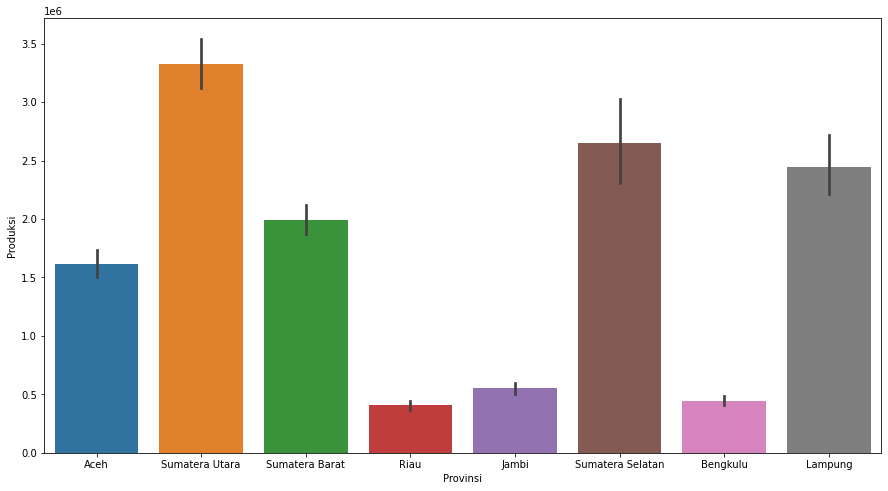

In [111]:
plt.figure(figsize=(15,8))
sns.barplot(data['Provinsi'],data['Produksi'])
plt.show()

North Sumatera has the highest yield production in the dataset.

In [112]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


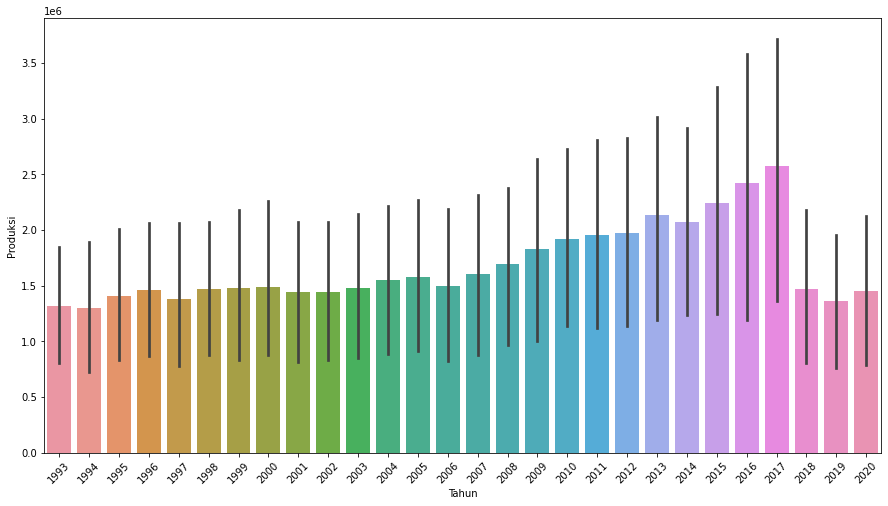

In [113]:
plt.figure(figsize=(15,8))
sns.barplot('Tahun','Produksi',data=data)
plt.xticks(rotation=45)
plt.show()

The year with the largest production was in 2017, but in the following years production has decreased significantly.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


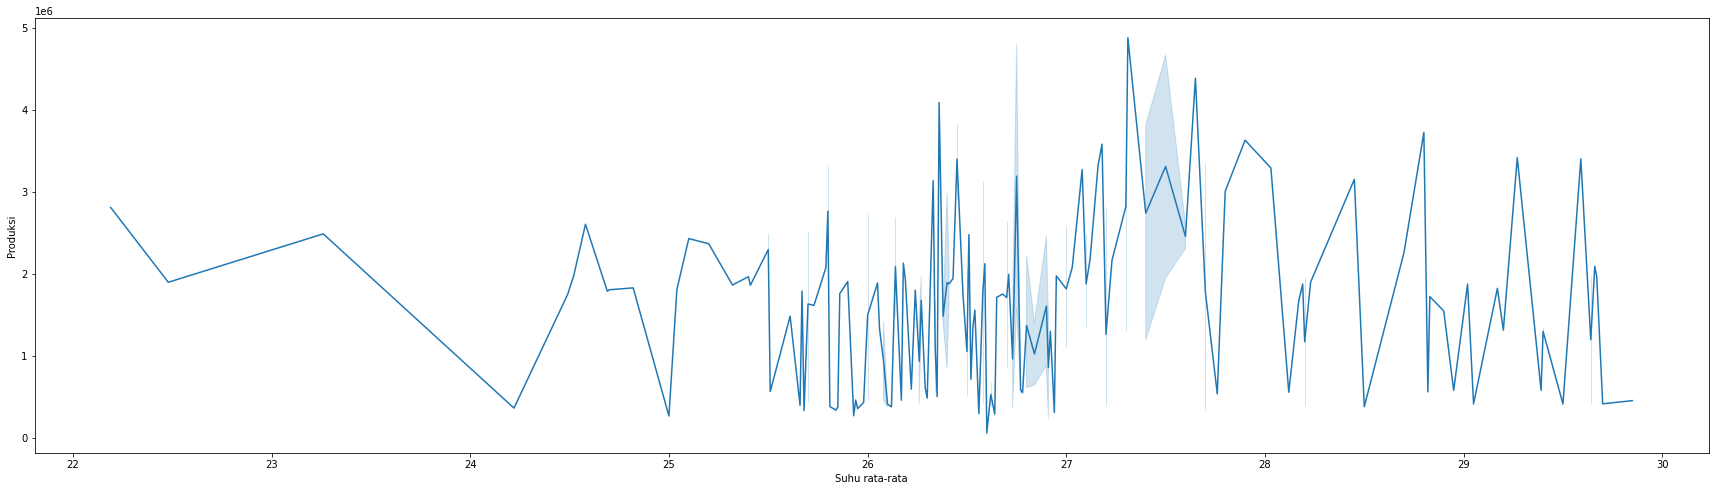

In [114]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Suhu rata-rata'],data['Produksi'])
plt.show()

Maximum production occurs when the average temperature is in the range of 27-28 degrees Celsius.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


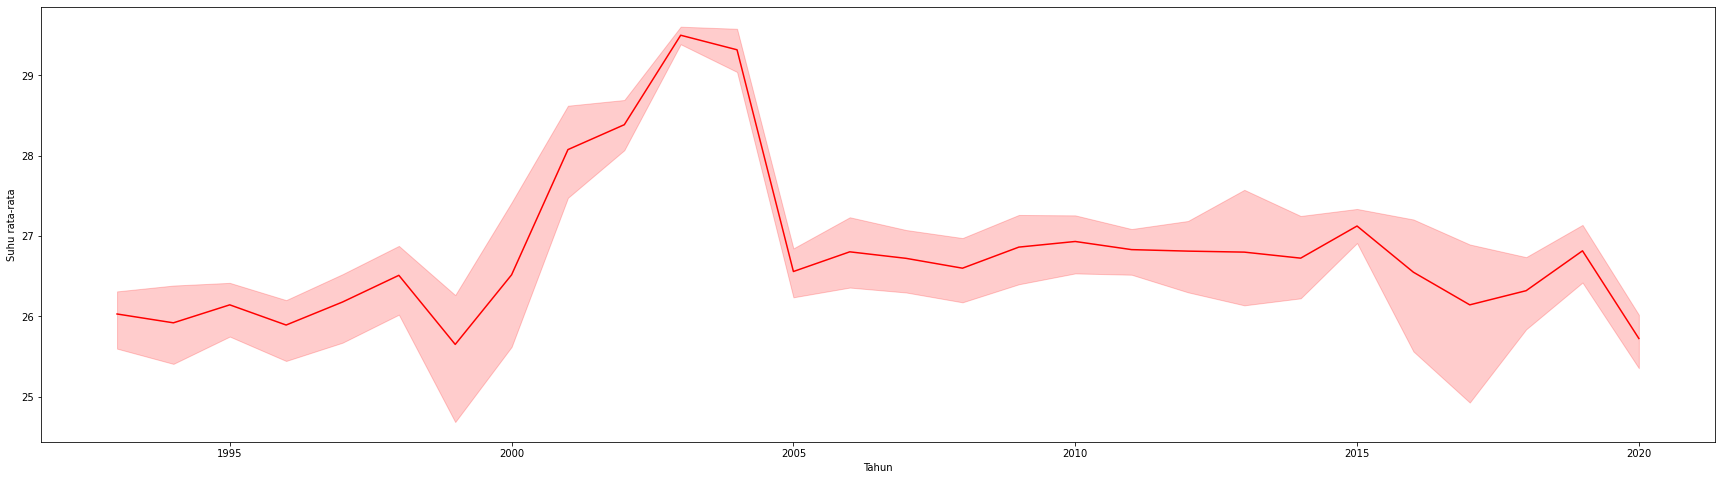

In [115]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Tahun'],data['Suhu rata-rata'], color='red')
plt.show()

The highest average temperature was ever achieved in the year 2000-2005, which was more than 29 degrees Celsius, but in the following years it tended to be stable in the temperature range of 27 degrees Celsius.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


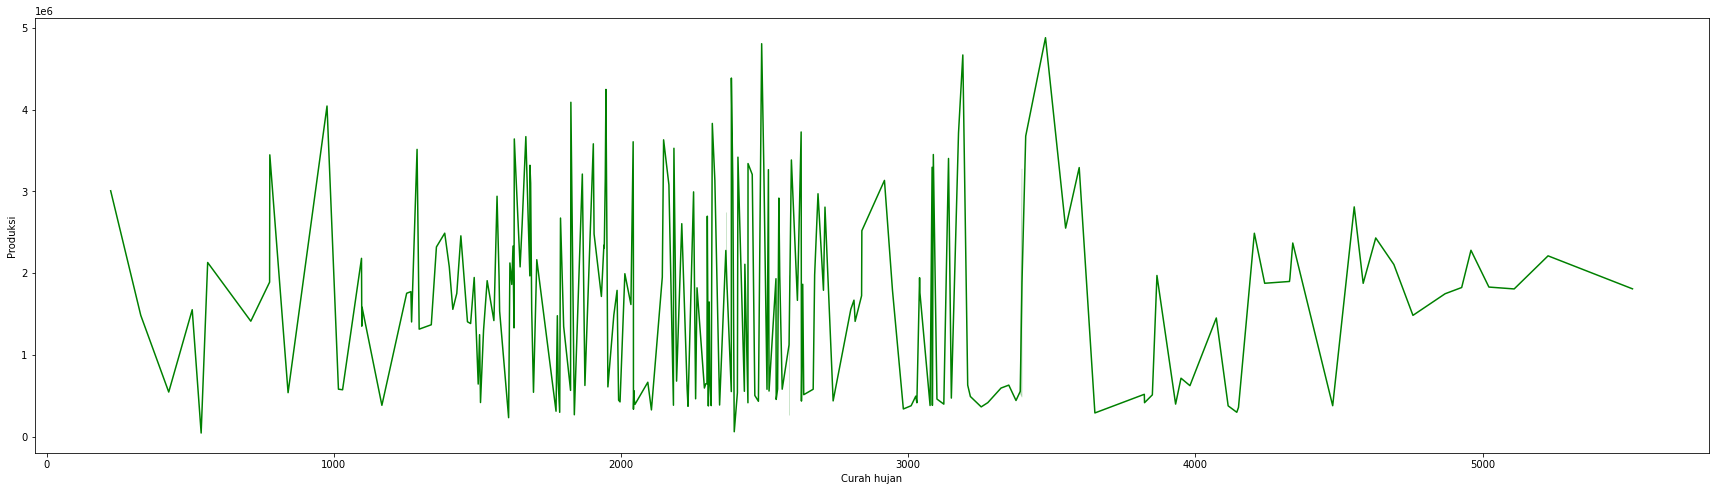

In [116]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Curah hujan'],data["Produksi"], color='green')
plt.show()

It can be said that production may be more stable in moderate rainfall, which is around 2500mm per year.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


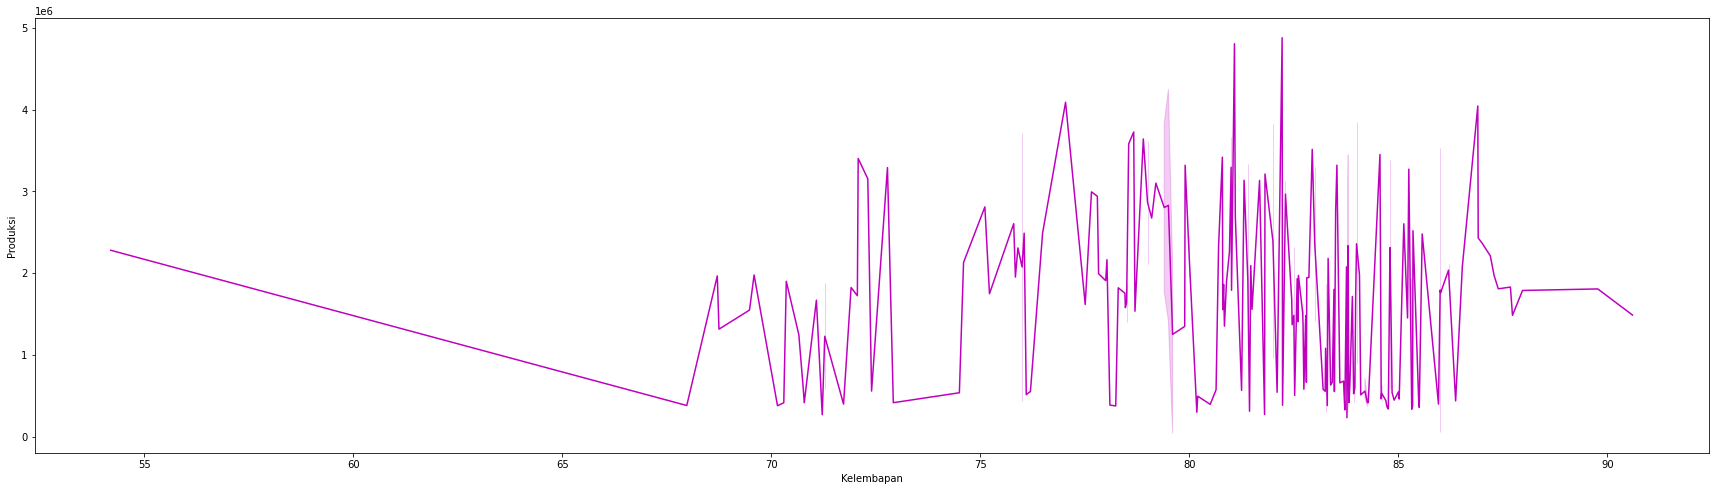

In [117]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Kelembapan'],data['Produksi'], color='m')
plt.show()

At a humidity level of around 80-85%, production looks more optimal and stable.

Based on the purpose of this notebook, the attribute that will be the output is the harvest (column = Production).

**a. Distribution of production quantities**

In [118]:
#statistical plot
import scipy.stats as stats
import pylab as py

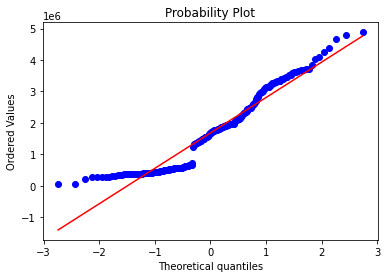

In [119]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

The QQ-plot above shows how the data is distributed from the selected variable, namely **Production** variable. The plot above is a plot of the theoretical quantile values ​​with the quantile values ​​of the selected variables. So, the plot will describe how many values ​​in a distribution are above or below a certain limit. From the plot results above, it is obtained that the lines tend to be straight, which means that over all the data distribution of these variables tends to be normal.

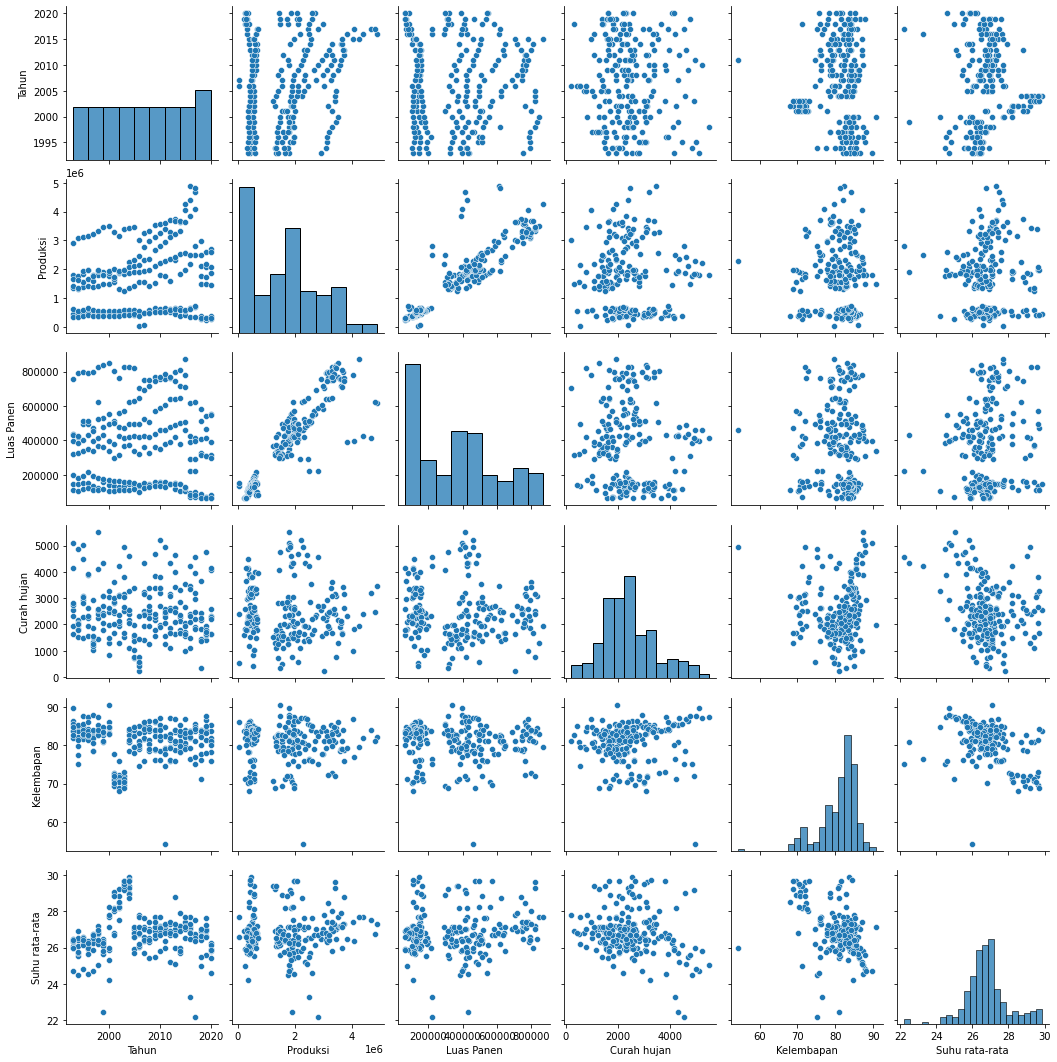

In [120]:
sns.pairplot(data)

**b. Checking the Outlier**

<AxesSubplot:>

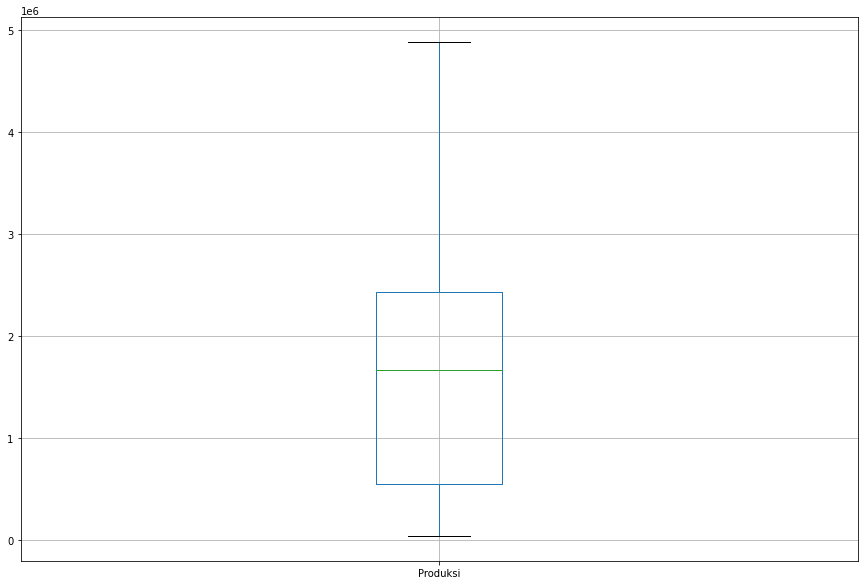

In [121]:
data[['Produksi']].boxplot(figsize=(15,10))

From the results of the vertical boxplot visualization above, it can be seen that there are no outliers from the output variable, **Production**.

**c. Correlation Matrix between numerical variables**

In [122]:
data.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [123]:
#change the column order
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


Note:
- Correlation >= 0.5 there is a coherent relationship between variables
- Correlation < 0.5 there is no close relationship between variables

In [124]:
df.corr()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


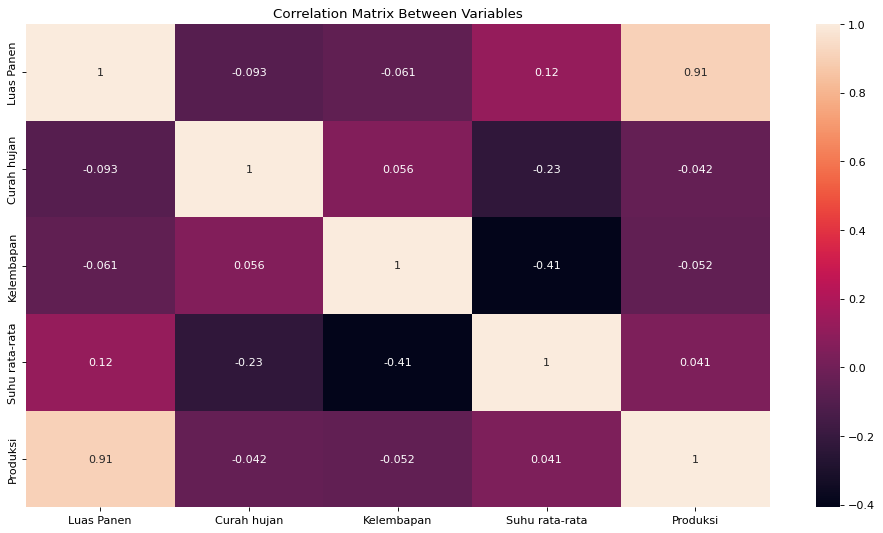

In [125]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Produksi'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Variables')
plt.show()

From the correlation matrix, it can be seen the type of correlation between the independent variables and the output variable. 

The area of ​​agricultural land and the average temperature have a positive correlation value, which means that when the value of those independent variable is greater, the production will also increase, although it may not be significant (effect from temperature). 

Meanwhile, the rainfall and humidity variables have a negative correlation value, which means that when those two variables get smaller, the production will increase (the movement of the graph moves in reverse), even though the relationship is not that strong.

# 3. Data Preprocessing (Feature Engineering)

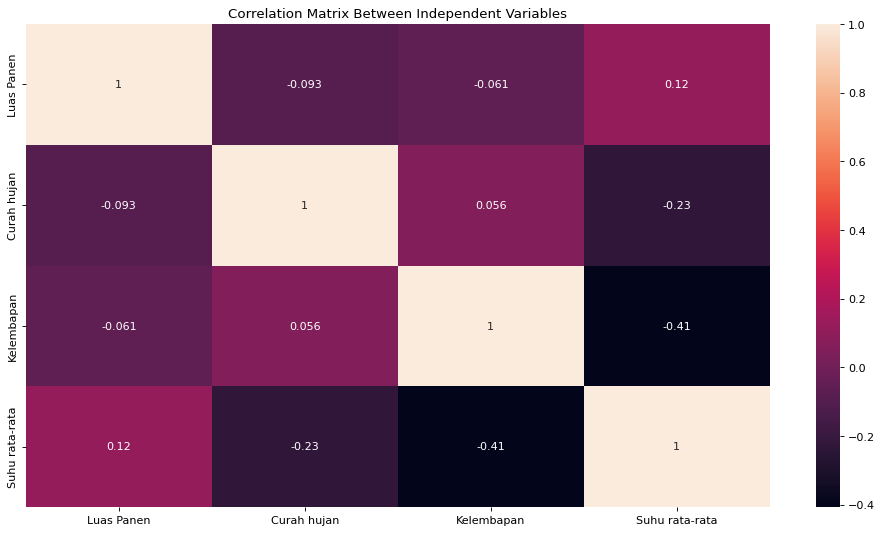

In [126]:
#checking multicollinearity
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Suhu rata-rata'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Independent Variables')
plt.show()

**Multicollinearit**y is a situation that indicates a strong correlation or relationship between two or more independent variables in a regression model which will affect the stability and accuracy of the model. One way to detect the existence of multicollinearity in the regression model is by looking at the strength of the correlation between the independent variables. If there is a correlation between the independent variables > 0.8 it can indicate the presence of multicollinearity.

So, from the matrix above it can be concluded that there is no multicollinearity found.

## Feature Encoding

Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this dataset, 'Province' values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical data must be converted to a numerical form. 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert 'Province' columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.

In [127]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,323589.0,1627.0,82.00,26.06,1329536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,329041.0,1521.0,82.12,26.92,1299699.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,339253.0,1476.0,82.72,26.27,1382905.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,348223.0,1557.0,83.00,26.08,1419128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,337561.0,1339.0,82.46,26.31,1368074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [128]:
df = df.drop(columns='Tahun')
df.tail()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,390799.00,2317.6,79.40,26.45,3831923.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,396559.00,1825.1,77.04,26.36,4090654.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,511940.93,1385.8,76.05,25.50,2488641.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,464103.42,1706.4,78.03,27.23,2164089.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,545149.05,2211.3,75.80,24.58,2604913.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [129]:
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

## Train and Test Split

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset).

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. We can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset).

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [131]:
X_train = x_train
X_test = x_test

In [132]:
X_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [133]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


## Feature Scaling

The dataset contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [135]:
x_train[:5]

array([[ 0.71669991, -0.83956692,  0.93754178,  0.69231249, -0.36115756,
        -0.40519021, -0.38348249, -0.36115756, -0.37240587, -0.37240587,
         2.76887462, -0.40519021],
       [ 1.92735709, -1.70505807,  0.63626219,  0.20923176, -0.36115756,
        -0.40519021, -0.38348249, -0.36115756, -0.37240587, -0.37240587,
        -0.36115756,  2.46797672],
       [-0.21895294, -1.97116607, -0.04331584, -0.00815457,  2.76887462,
        -0.40519021, -0.38348249, -0.36115756, -0.37240587, -0.37240587,
        -0.36115756, -0.40519021],
       [-0.90969035,  0.00012102, -2.19984345,  2.13350335, -0.36115756,
        -0.40519021,  2.60768096, -0.36115756, -0.37240587, -0.37240587,
        -0.36115756, -0.40519021],
       [-1.05176751, -0.27081277,  0.74046415, -0.00815457, -0.36115756,
        -0.40519021, -0.38348249, -0.36115756,  2.68524232, -0.37240587,
        -0.36115756, -0.40519021]])

In [136]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [137]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [138]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [139]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


# 4. Modeling

Modeling is done using 6 algorithms namely: 
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting
4. Support Vector Regressor 
5. Decision Tree Regressor and
6. K-Nearest Neighbors Regressor. 

For each model will be applied hyperparameter tuning to increase model perform based on R2-score. To find the best parameters will use Grid Search CV or Randomized Search CV, and it will depends how the algorithm work.

Cross-validation (CV) is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

To check how the model predict, will represent visualization in the form of graphical images of distplots from the results estimated by the algorithm with the original data.

Later an evaluation will be carried out to determine the best algorithm out of the six algorithms to be selected.

**Note**: When finished doing hyperparameter tuning using Randomized Search CV, the code is used as a comment because when the code is run again, the tuning results will be different, even though the model scores are not much different.

In [140]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Linear Regression

Linear Regression is an algorithm for regression modeling that is used to predict variable values based on the values of other variables.

In [141]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [142]:
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))   #do the inverse to return to the original value (because it was previously standardized)
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


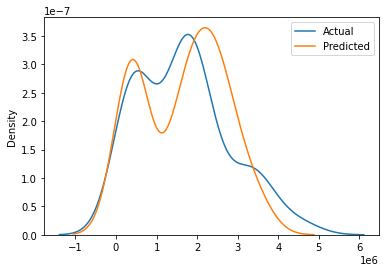

In [143]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [144]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524144 

The Average Cross Validation Score is 82.9


### Hyperparameter Tuning

In [145]:
LinReg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [146]:
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11), 
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}
Best score is 0.8387472527255266


### Fit New Model

In [147]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

In [148]:
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,4.556448e+05
64,2.049707e+06
65,2.917382e+06
66,1.980058e+06
67,1.487799e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


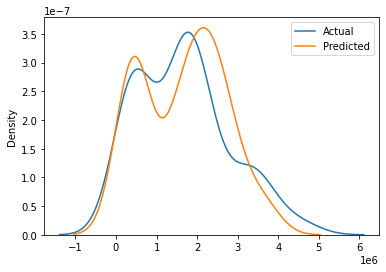

In [149]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [150]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  84.6508189494205
Test  :  86.89566591106708 

The Average Cross Validation Score is 83.0


The new model of Linear Regression has improved just a little bit after hyperparameter tuning.

## Random Forest Regression

Random Forest Regressor is an algorithm for regression modeling that is used to predict sustainable values.

In [151]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=0)

In [152]:
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

,0
63,4.490402e+05
64,1.875380e+06
65,2.600398e+06
66,1.951832e+06
67,2.114010e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


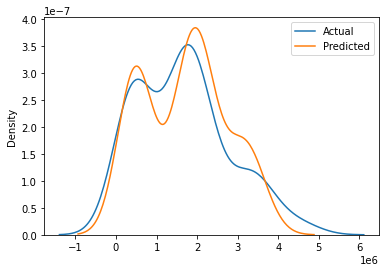

In [153]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [154]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Train :  95.23971349396201
Test  :  85.48007246824575 

The Average Cross Validation Score is 83.81


### Hyperparameter Tuning

In [155]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [156]:
#param_grid = {'bootstrap' : [True, False],
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'n_estimators': np.arange(100, 501)}             

#RFReg_tuning = RandomForestRegressor()

#RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

#RFReg_best_model = RFReg_search.fit(x_train, y_train.ravel())
#print('Optimum parameters', RFReg_best_model.best_params_)
#print('Best score is {}'.format(RFReg_best_model.best_score_))

### Fit New Model

In [157]:
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=9, n_estimators=227, random_state=0)

In [158]:
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,4.374426e+05
64,1.874739e+06
65,2.709860e+06
66,1.895373e+06
67,2.136797e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


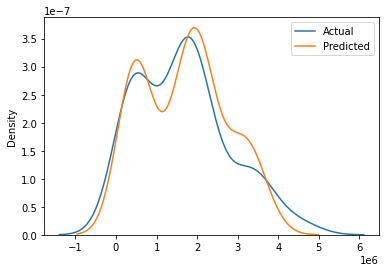

In [159]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [160]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100


#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression
Train :  97.47517414251053
Test  :  86.37724010302279 

The Average Cross Validation Score is 83.0


Random Forest Regression Model performing better after applied some tuned parameters.

## Gradient Boosting

Gradient Boosting Regressor gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

In [161]:
from sklearn.ensemble import GradientBoostingRegressor
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
GBReg.fit(x_train, y_train.ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)

In [162]:
ypred_GBReg = sc.inverse_transform(GBReg.predict(x_test).reshape(-1,1))
y_pred_GBReg = pd.DataFrame(ypred_GBReg)
y_pred_GBReg.tail()

,0
63,4.216658e+05
64,1.919787e+06
65,3.221704e+06
66,1.802274e+06
67,2.337136e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


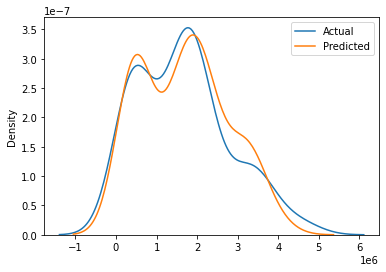

In [163]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_GBReg,hist=False,label='Predicted')
plt.legend()

In [164]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_train = GBReg.score(x_train,y_train.ravel())*100
GBReg_test = GBReg.score(x_test, y_test)*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_score = cross_val_score(GBReg,x,y,cv=GBReg_cv)

print('Train : ',GBReg_train)
print('Test  : ',GBReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_score)*100,2))

Gradient Boosting Regression


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Train :  99.99976363346896
Test  :  85.98294460533783 

The Average Cross Validation Score is 83.25


### Hyperparameter Tuning

In [165]:
GBReg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [166]:
#param_grid = {'subsample' : np.arange(0.1, 1.1),
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'n_estimators': [500, 1000, 2000],
#              'learning_rate': [0.001, 0.01, 0.1] }             

#GBReg_tuning = GradientBoostingRegressor()

#GBReg_search = RandomizedSearchCV(GBReg_tuning, param_grid, cv = 10, scoring='r2')

#GBReg_best_model = GBReg_search.fit(x_train, y_train.ravel())
#print('Optimum parameters', GBReg_best_model.best_params_)
#print('Best score is {}'.format(GBReg_best_model.best_score_))

### Fit New Model

In [167]:
GBReg_model = GradientBoostingRegressor(subsample= 0.1, n_estimators= 2000, min_samples_split= 9, min_samples_leaf= 1, max_depth= 10, learning_rate= 0.01, random_state= 0)
GBReg_model.fit(x_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=9,
                          n_estimators=2000, random_state=0, subsample=0.1)

In [168]:
ypred_GBReg_model = sc.inverse_transform(GBReg_model.predict(x_test).reshape(-1,1))
ypred_GBReg_model = pd.DataFrame(ypred_GBReg_model)
ypred_GBReg_model.tail()

,0
63,3.098038e+05
64,2.164963e+06
65,2.515733e+06
66,2.059401e+06
67,1.619067e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


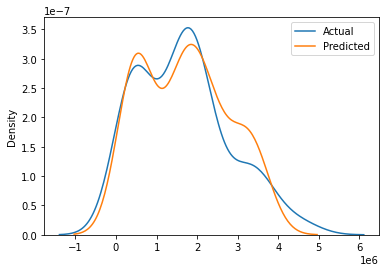

In [169]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')
plt.legend()

In [170]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_model_train = GBReg_model.score(x_train,y_train.ravel())*100
GBReg_model_test = GBReg_model.score(x_test, y_test.ravel())*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_model_score = cross_val_score(GBReg_model,x,y,cv=GBReg_model_cv)

print('Train : ',GBReg_model_train)
print('Test  : ',GBReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_model_score)*100,2))

Gradient Boosting Regression


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Train :  91.67962894437088
Test  :  86.20834231739471 

The Average Cross Validation Score is 83.96


The new regression model with the gradient boosting algorithm has decreased their accuracy in the train data but increased in the test.

## Support Vector Regression

SVR gives the flexibility to define how much error is acceptable in model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

In [171]:
from sklearn.svm import SVR
SVReg = SVR(gamma = 1)
SVReg.fit(x_train, y_train.ravel())

SVR(gamma=1)

In [172]:
ypred_SVReg = sc.inverse_transform(SVReg.predict(x_test).reshape(-1,1))
y_pred_SVReg = pd.DataFrame(ypred_SVReg)
y_pred_SVReg.tail()

,0
63,1.086560e+06
64,1.757398e+06
65,1.915177e+06
66,1.690874e+06
67,1.815422e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


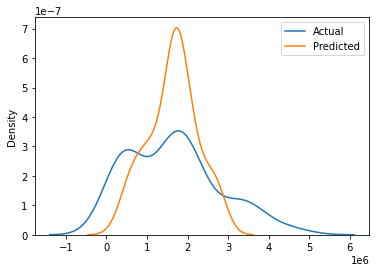

In [173]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_SVReg,hist=False,label='Predicted')
plt.legend()

In [174]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_train = SVReg.score(x_train,y_train.ravel())*100
SVReg_test = SVReg.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_score = cross_val_score(SVReg,x,y,cv=SVReg_cv)

print('Train : ',SVReg_train)
print('Test  : ',SVReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_score)*100,2))

Support Vector Regression
Train :  92.62509041219276
Test  :  60.81422434326272 

The Average Cross Validation Score is -7.15


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

### Hyperparameter Tuning

In [175]:
SVReg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [176]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.001, 0.01, 0.1]}             

SVReg_tuning = SVR()

SVReg_search = GridSearchCV(SVReg_tuning, param_grid, cv = 10, scoring='r2')

SVReg_best_model = SVReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', SVReg_best_model.best_params_)
print('Best score is {}'.format(SVReg_best_model.best_score_))

Optimum parameters {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Best score is 0.8410602764707769


### Fit New Model

In [177]:
SVReg_model = SVR(C= 1, epsilon= 0.1, gamma= 0.1)
SVReg_model.fit(x_train, y_train.ravel())

SVR(C=1, gamma=0.1)

In [178]:
ypred_SVReg_model = sc.inverse_transform(SVReg_model.predict(x_test).reshape(-1,1))
ypred_SVReg_model = pd.DataFrame(ypred_SVReg_model)
ypred_SVReg_model.tail()

,0
63,5.679776e+05
64,1.665946e+06
65,2.256916e+06
66,1.687524e+06
67,1.495696e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


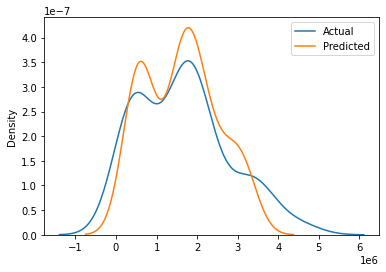

In [179]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')
plt.legend()

In [180]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_model_train = SVReg_model.score(x_train,y_train.ravel())*100
SVReg_model_test = SVReg_model.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_model_score = cross_val_score(SVReg,x,y,cv=SVReg_model_cv)

print('Train : ',SVReg_model_train)
print('Test  : ',SVReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_model_score)*100,2))

Support Vector Regression
Train :  87.44905125649251
Test  :  84.19387590969212 

The Average Cross Validation Score is -7.15


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The support vector regression model has decreased their accuracy in the train data but increased in the test, which means overfitting has minimized.

## Decision Tree Regression

Decision Tree Regressor is an algorithm for building a regression model that observes the features of an object and trains the model in a tree structure.

In [181]:
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [182]:
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

,0
63,4.256516e+05
64,1.916811e+06
65,1.826944e+06
66,1.827549e+06
67,2.392152e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


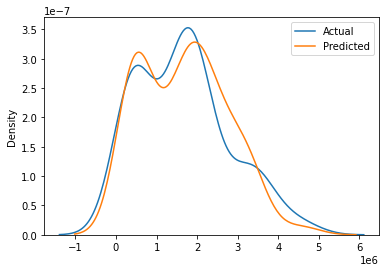

In [183]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [184]:
#Check the accuracy of testing and training of the Decision Tree Regression model
print('Decision Tree Regression')
DTreeReg_train = DTreeReg.score(x_train,y_train)*100
DTreeReg_test = DTreeReg.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_score = cross_val_score(DTreeReg,x,y,cv=DTreeReg_cv)

print('Train : ',DTreeReg_train)
print('Test  : ',DTreeReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_score)*100,2))

Decision Tree Regression
Train :  100.0
Test  :  73.21934331853251 

The Average Cross Validation Score is 64.39


### Hyperparameter Tuning

In [185]:
DTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [186]:
#param_grid = {'splitter' : ['best', 'random'],
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'max_features':['auto','log2','sqrt',None]}             

#DTreeReg_tuning = DecisionTreeRegressor()

#DTreeReg_search = RandomizedSearchCV(DTreeReg_tuning, param_grid, cv = 10, scoring='r2')

#DTreeReg_best_model = DTreeReg_search.fit(x_train, y_train)
#print('Optimum parameters', DTreeReg_best_model.best_params_)
#print('Best score is {}'.format(DTreeReg_best_model.best_score_))

### Fit New Model

In [187]:
DTreeReg_model = DecisionTreeRegressor(splitter= 'best', min_samples_split= 8, min_samples_leaf= 5, max_features= 'auto', max_depth= 2, random_state= 0)
DTreeReg_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_leaf=5,
                      min_samples_split=8, random_state=0)

In [188]:
ypred_DTreeReg_model = sc.inverse_transform(DTreeReg_model.predict(x_test).reshape(-1,1))
ypred_DTreeReg_model = pd.DataFrame(ypred_DTreeReg_model)
ypred_DTreeReg_model.tail()

,0
63,4.849200e+05
64,1.966208e+06
65,1.966208e+06
66,1.966208e+06
67,1.966208e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


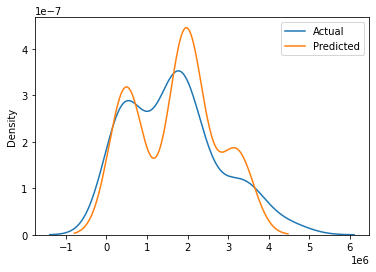

In [189]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')
plt.legend()

In [190]:
#Check the accuracy of testing and training of the Decision Tree Regression model
print('Decision Tree Regression')
DTreeReg_model_train = DTreeReg_model.score(x_train,y_train)*100
DTreeReg_model_test = DTreeReg_model.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_model_score = cross_val_score(DTreeReg_model,x,y,cv=DTreeReg_model_cv)

print('Train : ',DTreeReg_model_train)
print('Test  : ',DTreeReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_model_score)*100,2))

Decision Tree Regression
Train :  84.68468800789897
Test  :  81.42164309777542 

The Average Cross Validation Score is 78.52


The Decision Tree regression model that has used the results of hyperparameter tuning shows that the performance is more balanced between the train and the test data.

## K-Neighbors Regression

KNN Regressor is an algorithm for building a regression model that uses the average or median value of k neighbors to predict the target element.

In [191]:
from sklearn.neighbors import KNeighborsRegressor
KNNReg = KNeighborsRegressor(n_neighbors=1)
KNNReg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [192]:
ypred_KNNReg = sc.inverse_transform(KNNReg.predict(x_test).reshape(-1,1))
y_pred_KNNReg = pd.DataFrame(ypred_KNNReg)
y_pred_KNNReg.tail()

,0
63,4.256516e+05
64,1.783884e+06
65,4.178500e+06
66,1.826944e+06
67,1.455769e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


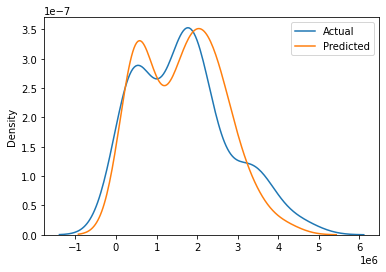

In [193]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')
plt.legend()

In [194]:
#Check the accuracy of testing and training of the K-Nearest Neighbors Regression model
print('K-Nearest Neighbors Regression')
KNNReg_train = KNNReg.score(x_train,y_train)*100
KNNReg_test = KNNReg.score(x_test, y_test)*100

#Assess the performance of the K-Nearest Neighbor Regression method by dividing the sample data by 10 folds randomly
KNNReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_score = cross_val_score(KNNReg,x,y,cv=KNNReg_cv)

print('Train : ',KNNReg_train)
print('Test  : ',KNNReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_score)*100,2))

K-Nearest Neighbors Regression
Train :  100.0
Test  :  86.62185171553706 

The Average Cross Validation Score is 71.02


### Hyperparameter Tuning

In [195]:
KNNReg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [196]:
param_grid = {'n_neighbors': np.arange(1, 10)}

KNNReg_tuning = KNeighborsRegressor()

KNNReg_search = GridSearchCV(KNNReg_tuning, param_grid, cv=10, scoring='r2')

KNNReg_best_model = KNNReg_search.fit(x_train, y_train)
print('Optimum parameters', KNNReg_best_model.best_params_)
print('Best score is {}'.format(KNNReg_best_model.best_score_))

Optimum parameters {'n_neighbors': 3}
Best score is 0.8140455477131845


### Fit New Model

In [197]:
KNNReg_model = KNeighborsRegressor(n_neighbors= 3)
KNNReg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [198]:
ypred_KNNReg_model = sc.inverse_transform(KNNReg_model.predict(x_test).reshape(-1,1))
ypred_KNNReg_model = pd.DataFrame(ypred_KNNReg_model)
ypred_KNNReg_model.tail()

,0
63,4.901651e+05
64,1.896004e+06
65,3.117505e+06
66,2.037919e+06
67,1.721345e+06


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


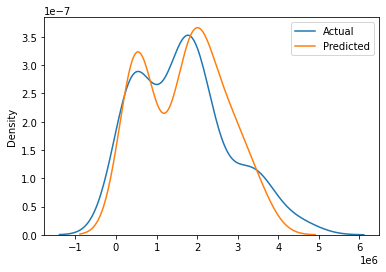

In [199]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')
plt.legend()

In [200]:
#Check the accuracy of testing and training of the K-Nearest Neighbors Regression model
print('K-Nearest Neighbors Regression')
KNNReg_model_train = KNNReg_model.score(x_train,y_train)*100
KNNReg_model_test = KNNReg_model.score(x_test, y_test)*100

#Assess the performance of the K-Nearest Neighbor Regression method by dividing the sample data by 10 folds randomly
KNNReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_model_score = cross_val_score(KNNReg_model,x,y,cv=KNNReg_model_cv)

print('Train : ',KNNReg_model_train)
print('Test  : ',KNNReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_model_score)*100,2))

K-Nearest Neighbors Regression
Train :  89.6868897055617
Test  :  86.28672507954892 

The Average Cross Validation Score is 77.2


After hyperparameter tuning, the new model no longer tends to overfit.

# 5. Model Evaluation

The evaluation below is carried out using the mean absolute error, mean squared error, and r2-score. The smaller the mean absolute error and mean squared error, but the greater the R2-score, the better the algorithm.

1. R2-score (coefficient of determination) regression score function will represents the proportion of the variance for items (crops) in the regression model. R2-score shows how well terms (data points) fit a curve or line.

2. The Mean absolute error (MAE) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

3. Mean Squared Error (MSE) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

In [201]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [202]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]
results.loc['SVR']=[r2_score(sc.inverse_transform(y_test),ypred_SVReg_model)*100,
                    mean_absolute_error(sc.inverse_transform(y_test),ypred_SVReg_model),
                    mean_squared_error(sc.inverse_transform(y_test),ypred_SVReg_model)]
results.loc['Decision Tree']=[r2_score(sc.inverse_transform(y_test),ypred_DTreeReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_DTreeReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),ypred_DTreeReg_model)]
results.loc['K-Neighbors']=[r2_score(sc.inverse_transform(y_test),ypred_KNNReg_model)*100,
                            mean_absolute_error(sc.inverse_transform(y_test),ypred_KNNReg_model),
                            mean_squared_error(sc.inverse_transform(y_test),ypred_KNNReg_model)]

#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.895666,261049.168107,160199780301.228729
Random Forest,86.377240,224668.555252,177505334097.156494
K-Neighbors,86.286725,269658.437076,167644049255.577728
Gradient Boosting,86.208342,265741.634590,168602274312.363312
SVR,84.193876,284771.942122,193229017933.827148
Decision Tree,81.421643,281254.415963,227119415141.265686


From results viewed above, model with Linear Regression algorithm has the highest R2-score - 86.9%. So that, this model can be the best choice for use in predicting agricultural production in Sumatra, in accordance with the objectives described earlier.

# Global Explanation

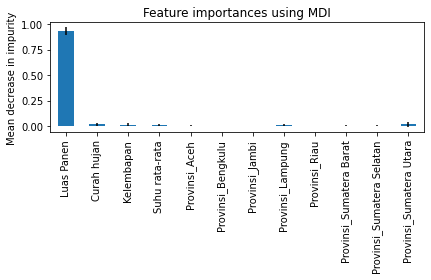

In [203]:
importances = RFReg.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in RFReg.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Local Explanation: LIME

In [204]:
import lime
import lime.lime_tabular

# Membuat objek LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Produksi'],
    mode='regression'
)

In [205]:
# Memilih satu instance dari data uji untuk dijelaskan
i = 2  # atau pilih indeks lain dari data uji
exp = explainer.explain_instance(X_test.iloc[i], RFReg.predict, num_features=4)

In [206]:
for i in range(4):
    print(f"{exp.as_list()[i][0]}: {exp.as_list()[i][1]:.2f}")

Suhu rata-rata <= 26.12: 0.00
Luas Panen <= 147470.75: 0.00
1797.25 < Curah hujan <= 2376.00: -0.00
Kelembapan > 83.97: 0.00


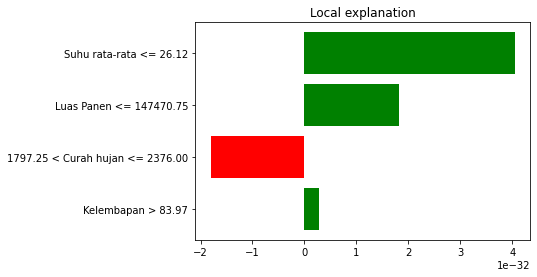

In [207]:
from lime import lime_tabular

fig = exp.as_pyplot_figure()

In [208]:
# Menampilkan hasil penjelasan
exp.show_in_notebook(show_table=True)